<a href="https://colab.research.google.com/github/harman-ransi-1016/TSLA_Sentiment_StockPred/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Harman Ransi**  
**12/1/2023**  
**ML2**  
**Project - Modeling**  
______________

Part II of project. Dataset cleaning portion is done at the beginning to get the average sentiment of each stock per day from the Tweet Sentiments. Next portion is focused on making time series models.

# 1) Final Dataset Cleaning

## a) Importing and Cleaning

Notes
* Reduced Dataset from 80,793 Tweets to 35,164 after removing 0 score sentiments

In [ ]:
import pandas as pd

# tweets and stocks
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning II/Project-Final/data/data.csv')

In [ ]:
df.head()

,Stock Name,Date,Time,Tweet,Open,High,Low,Close,Volume,Vader_Sentiment,Happy,Angry,Surprise,Sad,Fear
0,TSLA,2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,282.76001,283.649994,265.779999,268.209991,77620600.0,0.0772,0.00,0.0,0.29,0.14,0.57
1,TSLA,2022-09-29,23:24:43,Tesla delivery estimates are at around k from ...,282.76001,283.649994,265.779999,268.209991,77620600.0,0.0000,0.00,0.0,0.00,0.00,0.00
2,TSLA,2022-09-29,23:18:08,"/ Even if I include M unvested RSUs as of /30,...",282.76001,283.649994,265.779999,268.209991,77620600.0,0.2960,0.33,0.0,0.00,0.00,0.67
3,TSLA,2022-09-29,22:40:07,Hahaha why are you still trying to stop Tesla ...,282.76001,283.649994,265.779999,268.209991,77620600.0,-0.7568,0.00,0.0,0.33,0.33,0.33
4,TSLA,2022-09-29,22:27:05,"Stop trying to kill kids, you sad deranged old...",282.76001,283.649994,265.779999,268.209991,77620600.0,-0.8750,0.25,0.0,0.25,0.50,0.00


In [ ]:
len(df)

80793

In [ ]:
df = df[df['Vader_Sentiment'] != 0]
# Create a new column 'Emotion_Count' with the count of numeric emotion columns
df['Emotion_Count'] = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].apply(lambda row: row.astype(bool).sum(), axis=1)

# Drop rows where 'Emotion_Count' is less than 2
df = df[df['Emotion_Count'] >= 2]

# Drop the 'Emotion_Count' column as it's no longer needed
df = df.drop(columns=['Emotion_Count'])

In [ ]:
len(df)

35164

In [ ]:
# Group by 'Stock Name' and 'Date' and calculate the mean for each group
df_grouped = df.groupby(['Stock Name', 'Date']).agg({
    'Vader_Sentiment': 'mean',
    'Happy': 'mean',
    'Angry': 'mean',
    'Surprise': 'mean',
    'Sad': 'mean',
    'Fear': 'mean',
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Volume': 'mean'
}).reset_index()

# Rename columns without the "Average_" prefix
df_grouped.columns = ['StockName', 'Date', 'Vader_Sentiment', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear',  'Open', 'High', 'Low', 'Close', 'Volume']

# If you want to overwrite the original DataFrame 'df' with the grouped and renamed data
df = df_grouped.copy()

In [ ]:
df.head()

,StockName,Date,Vader_Sentiment,Happy,Angry,Surprise,Sad,Fear,Open,High,Low,Close,Volume
0,AAPL,2021-09-30,0.089767,0.056667,0.11,0.0000,0.276667,0.553333,143.660004,144.380005,141.279999,141.500000,89056700.0
1,AAPL,2021-10-01,0.240925,0.207500,0.00,0.0625,0.125000,0.605000,141.899994,142.919998,139.110001,142.649994,94639600.0
2,AAPL,2021-10-02,0.458800,0.140000,0.00,0.0000,0.000000,0.860000,NaN,NaN,NaN,NaN,NaN
3,AAPL,2021-10-03,0.834400,0.000000,0.00,0.0000,0.750000,0.250000,NaN,NaN,NaN,NaN,NaN
4,AAPL,2021-10-04,0.051600,0.000000,0.00,0.0000,0.200000,0.800000,141.759995,142.210007,138.270004,139.139999,98322000.0


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'Date' is the column with dates
df['Date'] = pd.to_datetime(df['Date'])

# Create a new DataFrame to hold the averaged sentiments
avg_df = pd.DataFrame(columns=df.columns)

# Iterate over the DataFrame by 'StockName'
for stock in df['StockName'].unique():
    stock_df = df[df['StockName'] == stock].copy()

    # Identify the closed days
    closed_days = stock_df[stock_df['Open'].isna()].index

    # Iterate over the closed days
    for day in closed_days:
        # Find the next open day
        next_days = stock_df.loc[day:].dropna()

        # Check if there are open days
        if not next_days.empty:
            next_day = next_days.index[0]

            # Average the sentiment
            stock_df.loc[next_day, ['Vader_Sentiment', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear']] = (stock_df.loc[day:next_day, ['Vader_Sentiment', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].mean())

    # Drop the closed days
    stock_df = stock_df.drop(closed_days)

    # Append the stock data to the averaged DataFrame
    avg_df = pd.concat([avg_df, stock_df])

# Reset the index of the averaged DataFrame
avg_df = avg_df.reset_index(drop=True)



KeyboardInterrupt: 

In [ ]:
# Specify the new order of the columns
new_order = ['StockName', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Vader_Sentiment', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

# Reorder the columns
avg_df = avg_df[new_order]

# Rename avg_df back to df
df = avg_df

df.head()


In [ ]:
# Export df to a CSV file
df.to_csv('final_data.csv', index=False)

## b) Emotion Distribution Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for emotions excluding 'Vader_Sentiment'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']])
plt.title('Distribution of Average T2E Scores')
plt.ylabel('Value [0 - 1]')

# Show the plot
plt.show()

# Count the number of zeros for each emotion
zero_counts = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].eq(0).sum()

# Display the count of zeros
print()
print("Number of 0's for each emotion:")
print(zero_counts)

NameError: name 'df' is not defined

<Figure size 1200x800 with 0 Axes>

## c) Understanding Stock Trends

* These stocks have lots of public opinion
* Good variety of volatile and steady stocks.

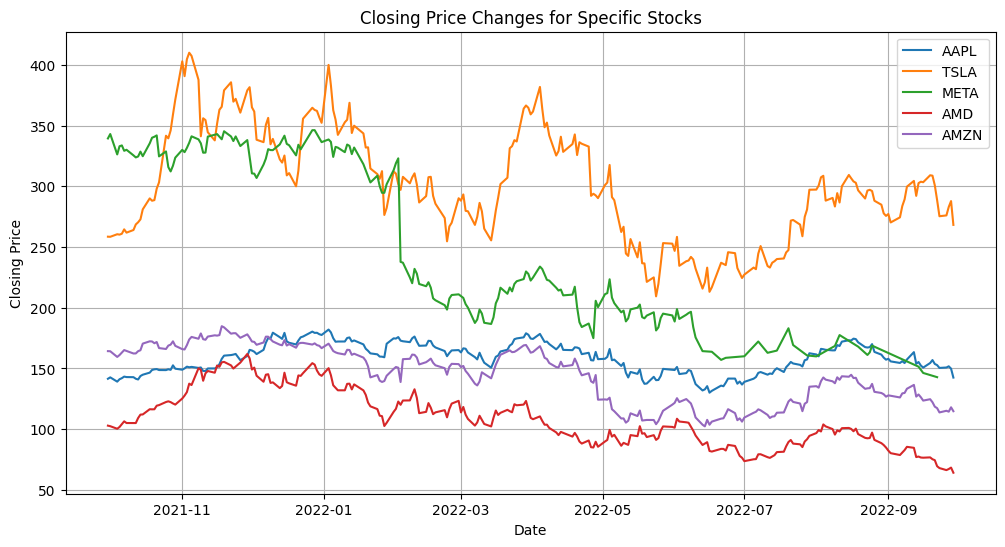

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the DataFrame named 'df' with the provided data

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# List of specific stocks
specific_stocks = ['AAPL', 'TSLA', 'META', 'AMD', 'AMZN']

# Filter the DataFrame for the specific stocks
filtered_df = df[df['StockName'].isin(specific_stocks)]

# Plotting
plt.figure(figsize=(12, 6))

# Iterate over the specific stocks
for stock in specific_stocks:
    stock_data = filtered_df[filtered_df['StockName'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Changes for Specific Stocks')
plt.legend()
plt.grid(True)
plt.show()



# 2) Modeling

## a) Understanding significant variables


In [ ]:
import pandas as pd

# tweets and stocks
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning II/Project-Final/data/Time-Series-Data.csv')
desired_stocks = ['TSLA']
df = df[df['StockName'].isin(desired_stocks)]
df.head()

,StockName,Date,Open,High,Low,Close,Volume,Vader_Sentiment,Happy,Angry,Surprise,Sad,Fear
2794,TSLA,2021-09-30,260.333344,263.043335,258.333344,258.493347,53868000.0,0.271525,0.153125,0.101667,0.123542,0.227292,0.392083
2795,TSLA,2021-10-01,259.466675,260.260010,254.529999,258.406677,51094200.0,0.245488,0.113953,0.057209,0.226977,0.178140,0.423023
2796,TSLA,2021-10-04,265.500000,268.989990,258.706665,260.510010,91449900.0,0.347718,0.132039,0.065770,0.159549,0.186895,0.454417
2797,TSLA,2021-10-05,261.600006,265.769989,258.066681,260.196655,55297800.0,0.123674,0.126809,0.082553,0.140426,0.172128,0.477447
2798,TSLA,2021-10-06,258.733337,262.220001,257.739990,260.916656,43898400.0,0.325621,0.177895,0.077105,0.175789,0.211316,0.356316


Granger Causality Test

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming 'df' is your DataFrame with the provided information
# Define the list of emotions to analyze
emotions = ['Vader_Sentiment', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

lags = range(1, 6)  # Adjust the range as needed

# Create an empty DataFrame to store the p-values
p_values_df = pd.DataFrame(index=lags, columns=['Lag'] + emotions)

for emotion in emotions:
    for lag in lags:
        # Perform Granger causality test
        result = grangercausalitytests(df[[emotion, 'Close']], maxlag=lag, verbose=False)

        # Extract the p-value from the test result and round to the nearest thousandth
        p_value = round(result[lag][0]['ssr_ftest'][1], 3)

        # Store the rounded p-value in the DataFrame
        p_values_df.at[lag, emotion] = p_value

# Add the 'Lag' column to the DataFrame
p_values_df['Lag'] = p_values_df.index

# Set 'Lag' as the first column
p_values_df = p_values_df[['Lag'] + emotions]

# Print the resulting DataFrame with rounded p-values
print(p_values_df)



   Lag Vader_Sentiment  Happy  Angry Surprise    Sad   Fear
1    1             0.0  0.093  0.705    0.271  0.008  0.688
2    2             0.0  0.309  0.829    0.296  0.017  0.205
3    3           0.001  0.359  0.511    0.405  0.051  0.463
4    4           0.005   0.54   0.39    0.449  0.068  0.421
5    5           0.013  0.526  0.468    0.361  0.024  0.529


In [ ]:
# Import the necessary library
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and it has been defined already
df = df[['Date', 'Close', 'Vader_Sentiment', 'Sad']].copy()

# Normalize 'Close' column
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']].values.reshape(-1, 1))

# Create a function to generate a lagged dataset
def create_lagged_dataset(df, lag=1):
    df_lagged = df.copy()
    for i in range(1, lag + 1):
        df_lagged[['Vader_Sentiment', 'Sad']] = df[['Vader_Sentiment', 'Sad']].shift(i)
    df_lagged = df_lagged.dropna()
    return df_lagged

# Generate a lagged dataset with a lag of 1 day
df_lagged = create_lagged_dataset(df, lag=1)

df_lagged.head()

,Date,Close,Vader_Sentiment,Sad
2795,2021-10-01,0.244387,0.271525,0.227292
2796,2021-10-04,0.254873,0.245488,0.178140
2797,2021-10-05,0.253311,0.347718,0.186895
2798,2021-10-06,0.256901,0.123674,0.172128
2799,2021-10-07,0.274948,0.325621,0.211316


## b) SVR (Rolling)

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the dataset into training and testing sets
train = df_lagged[(df_lagged['Date'] >= '2021-09-30') & (df_lagged['Date'] <= '2022-04-01')]
test = df_lagged[(df_lagged['Date'] >= '2022-04-02') & (df_lagged['Date'] <= '2022-05-10')]

# Separate the features and the target variable
X_train = train.drop(['Close', 'Date'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close', 'Date'], axis=1)
y_test = test['Close']

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVR model
model = SVR(kernel='rbf', C=1000000.0, gamma=0.000618)

# Create a list to store predictions
predictions = []

# Iterate over the test data
for i in range(len(X_test)):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make a prediction on the next data point in the test set
    pred = model.predict(X_test[i].reshape(1, -1))

    # Append the prediction to the list
    predictions.append(pred[0])

    # Add the test data point to the training data
    X_train = np.append(X_train, X_test[i].reshape(1, -1), axis=0)
    y_train = np.append(y_train, y_test.iloc[i])


<ipython-input-217-ebbb89a75a48>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Date'] = pd.to_datetime(test['Date']).dt.tz_localize(pytz.UTC)


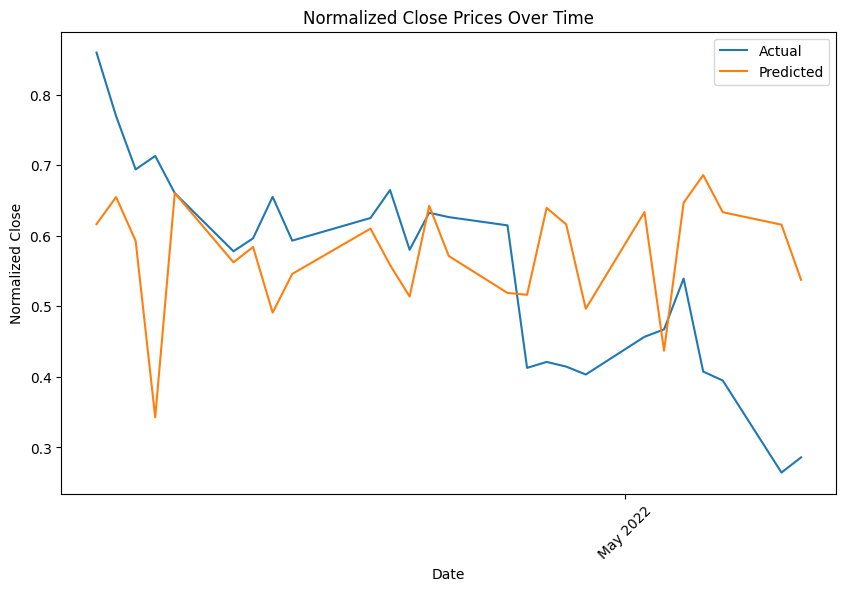

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from pandas.api.types import is_datetime64_dtype
import pytz

# Convert the 'Date' column to datetime format if it isn't already
if not is_datetime64_dtype(test['Date']):
    with pd.option_context('mode.chained_assignment', None):
        test.loc[:, 'Date'] = pd.to_datetime(test['Date']).dt.tz_localize(pytz.UTC)

# Add the predictions to the test DataFrame
with pd.option_context('mode.chained_assignment', None):
    test.loc[:, 'Predicted_Close'] = predictions

# Create a new DataFrame for plotting
plot_df = test[['Date', 'Close', 'Predicted_Close']].copy()


plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(plot_df['Date'], plot_df['Close'], label='Actual')

# Add the predictions to the plot
plt.plot(plot_df['Date'], plot_df['Predicted_Close'], label='Predicted')

# Set the x-axis locator and formatter
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add remaining plot details
plt.title('Normalized Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close')
plt.legend()

plt.show()



In [ ]:
df_lagged.head()

,Date,Close,Vader_Sentiment,Sad
2795,2021-10-01,0.244387,0.271525,0.227292
2796,2021-10-04,0.254873,0.245488,0.178140
2797,2021-10-05,0.253311,0.347718,0.186895
2798,2021-10-06,0.256901,0.123674,0.172128
2799,2021-10-07,0.274948,0.325621,0.211316


In [ ]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print('Mean Absolute Percentage Error:', mape)

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Calculate the directional accuracy
directional_accuracy = np.mean((np.sign(y_test.values[1:] - y_test.values[:-1]) == np.sign(predictions[1:] - predictions[:-1])).astype(int)) * 100
print('Directional Accuracy:', directional_accuracy)

Mean Absolute Percentage Error: 29.515292735801435
Directional Accuracy: 64.0


## c) Logistic Regression (Rolling)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas.api.types import is_datetime64_dtype
import numpy as np
import pandas as pd
import warnings

# Suppress warnings during the fitting process
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Assuming df_lagged is your DataFrame and 'Close' is your target variable
df_lagged['Close'] = df_lagged['Close'].diff()  # Calculate the difference
df_lagged['Close'] = df_lagged['Close'].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary

# Split the dataset into training and testing sets
train = df_lagged[(df_lagged['Date'] >= '2021-09-30') & (df_lagged['Date'] <= '2022-03-15')]
test = df_lagged[(df_lagged['Date'] >= '2022-03-16') & (df_lagged['Date'] <= '2022-05-16')]

# Separate the features and the target variable
X_train = train[['Vader_Sentiment', 'Sad']]
y_train = train['Close']
X_test = test[['Vader_Sentiment', 'Sad']]
y_test = test['Close']

# Create the model
model = LogisticRegression(penalty='l2', fit_intercept=False, C=0.1)

# Lists to store the predictions and actual values
predictions = []
actuals = []

# Rolling forecast
for i in range(len(X_test)):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make a prediction for the next day
    y_pred = model.predict(X_test.iloc[i, :].values.reshape(1, -1))

    # Add the prediction and actual value to their respective lists
    predictions.append(y_pred[0])
    actuals.append(y_test.iloc[i])

    # Add the tested day to the training set for the next iteration
    X_train = X_train.append(X_test.iloc[i, :])
    y_train = y_train.append(y_test.iloc[[i]])

# Evaluate the model
directional_accuracy = accuracy_score(actuals, predictions)
print(f'Directional Accuracy: {directional_accuracy}')

NameError: name 'df_lagged' is not defined

No plot bc you can't actually tell the accuracy (1 for up zero for down)

## d) Linear Regression (Rolling)

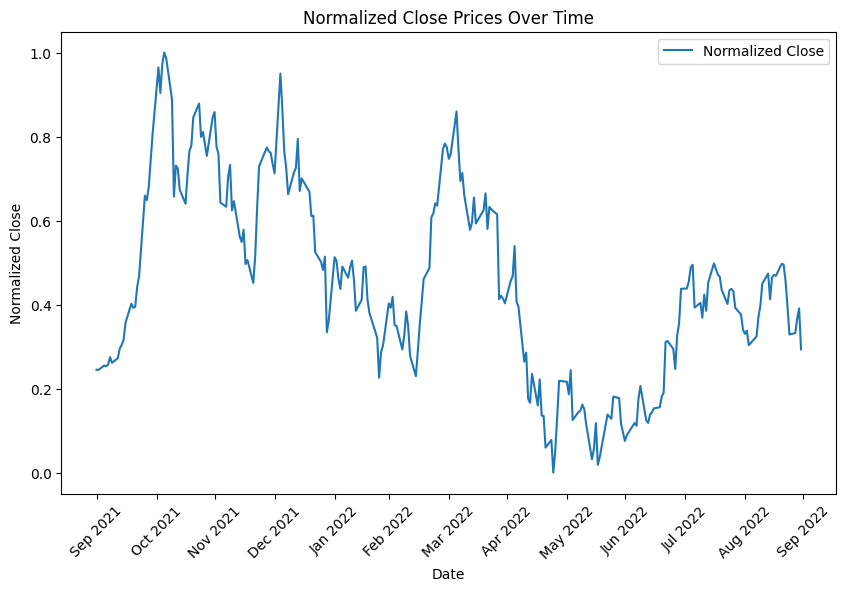

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from pandas.api.types import is_datetime64_dtype
import matplotlib.dates as mdates


# Normalize the 'Close' column
scaler = MinMaxScaler()
df['Normalized_Close'] = scaler.fit_transform(df[['Close']])


# Check and convert the 'Date' column to datetime format if needed
if not is_datetime64_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

# Normalize the 'Close' column (you can use MinMaxScaler or any other method)
df['Normalized_Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Normalized_Close'], label='Normalized Close')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))
plt.xticks(rotation=45)
plt.title('Normalized Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close')
plt.legend()
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a function to generate a lagged dataset
def create_lagged_dataset(df, lag=1):
    df_lagged = df.copy()
    for i in range(1, lag + 1):
        df_lagged[['Vader_Sentiment', 'Sad']] = df[['Vader_Sentiment', 'Sad']].shift(i)
    df_lagged = df_lagged.dropna()
    return df_lagged

# Generate a lagged dataset with a lag of 1 day
df_lagged = create_lagged_dataset(df, lag=1)

# Split the dataset into training and testing sets
train = df_lagged[(df_lagged['Date'] >= '2021-09-30') & (df_lagged['Date'] <= '2022-04-01')]
test = df_lagged[(df_lagged['Date'] >= '2022-04-02') & (df_lagged['Date'] <= '2022-05-16')]

# Separate the features and the target variable
X_train = train.drop(['Close', 'Date'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close', 'Date'], axis=1)
y_test = test['Close']

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Create a list to store predictions
predictions = []

# Iterate over the test data
for i in range(len(X_test)):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make a prediction on the next data point in the test set
    pred = model.predict(X_test[i].reshape(1, -1))

    # Append the prediction to the list
    predictions.append(pred[0])

    # Add the test data point to the training data
    X_train = np.append(X_train, X_test[i].reshape(1, -1), axis=0)
    y_train = np.append(y_train, y_test.iloc[i])

# Calculate the MAPE
mape = np.mean(np.abs((np.array(y_test) - np.array(predictions)) / np.array(y_test))) * 100
print(f'MAPE: {mape}')

MAPE: 48.64726060807796


<ipython-input-219-6746159db024>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Date'] = pd.to_datetime(test['Date'])


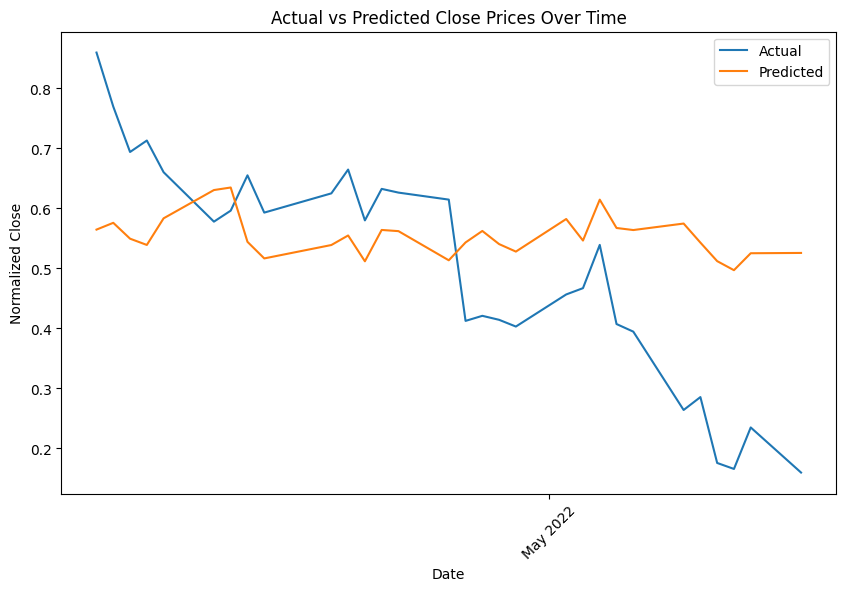

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from pandas.api.types import is_datetime64_dtype

# Convert the 'Date' column to datetime format if it isn't already
if not is_datetime64_dtype(test['Date']):
    with pd.option_context('mode.chained_assignment', None):
        test.loc[:, 'Date'] = pd.to_datetime(test['Date'])

# Add the predictions to the test DataFrame
with pd.option_context('mode.chained_assignment', None):
    test.loc[:, 'Predicted_Close'] = predictions

# Create a new DataFrame for plotting
plot_df = test[['Date', 'Close', 'Predicted_Close']].copy()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Date'], plot_df['Close'], label='Actual')
plt.plot(plot_df['Date'], plot_df['Predicted_Close'], label='Predicted')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Normalized Close')
plt.title('Actual vs Predicted Close Prices Over Time')
plt.legend()
plt.show()


## e) CNN

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the dataset into training and testing sets
train = df_lagged[(df_lagged['Date'] >= '2021-09-30') & (df_lagged['Date'] <= '2022-04-01')]
test = df_lagged[(df_lagged['Date'] >= '2022-04-02') & (df_lagged['Date'] <= '2022-09-29')]

# Separate the features and the target variable
X_train = train.drop(['Close', 'Date'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close', 'Date'], axis=1)
y_test = test['Close']

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize an empty DataFrame to store predictions
predictions = pd.DataFrame(columns=['Date', 'Prediction'])
# Set 'Date' as the index
train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)

In [ ]:
!pip install mxnet
!pip install gluonts

In [ ]:
from gluonts.mx.model.deepstate import DeepStateEstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions


# Prepare the datasets
training_data = ListDataset(
    [{"start": train.index[0], "target": train['Close'], "feat_dynamic_real": train[['Vader_Sentiment', 'Sad']].values.tolist()}],
    freq="1D"
)
testing_data = ListDataset(
    [{"start": test.index[0], "target": test['Close'], "feat_dynamic_real": test[['Vader_Sentiment', 'Sad']].values.tolist()}],
    freq="1D"
)

In [ ]:
# Specify the model
estimator = DeepStateEstimator(
    prediction_length=1,
    freq='1D',
    cardinality=[1],
    use_feat_static_cat=False,
    trainer=Trainer(ctx="cpu",
                    epochs=25,
                    learning_rate=1e-3,
                    num_batches_per_epoch=100
                   )
)


# Train the model
predictor = estimator.train(training_data=training_data)

# Generate predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=testing_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

# Extract the prediction values and store them in a list
pred_vals = [np.mean(forecast.samples, axis=0) for forecast in forecasts]

# If you want to store the dates as well, you can do so like this:
pred_dates = [forecast.start_date for forecast in forecasts]

100%|██████████| 100/100 [00:40<00:00,  2.48it/s, epoch=25/25, avg_epoch_loss=-3.11]


In [ ]:
from gluonts.evaluation import Evaluator

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(testing_data))

# Get the MAPE of all predictions
mape = agg_metrics['MAPE']
print(f"MAPE: {mape}")

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 15.12it/s]

MAPE: 0.32041361927986145
